# Two Qubit Topological Gates

<hr>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\qgate}[1]{ \mathop{\textit{#1} } }$

Since we have seen that braiding Fibonacci anyons is able to approximate any single qubit quantum gate, let's see how to approximate some types of two qubit quantum gates using purely topological braiding operations.

In this module, we shall focus on constructing Controlled-Unitary gates using the method of injection introduced by [Bonesteel et. al.](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.95.140503)

## Injection Method

Our starting point is the braiding Identity operation.

We claim that the following weave approximates the identity matrix up to a global phase such that the woven strand starts from the 3'rd rank and ends up in the 1'st rank:
$$I \approx \sigma_1^{3}\sigma_2^{-2}\sigma_1^{2}\sigma_2^{2}\sigma_1^{-2}\sigma_2^{2}\sigma_1^{4}\sigma_2^{-2}\sigma_1^{-4} \sigma_2^{-4} \sigma_1^{-2} \sigma_2^{-2} \sigma_1^{2} \sigma_2^{4}\sigma_1^{2}\sigma_2^{-4}\sigma_1^{-2}\sigma_2^3$$

In [1]:
# identity braiding sequence
iw = [[2, 3], [1, -2], [2, -4], [1, 2], [2, 4], [1, 2], [2, -2], [1, -2], [2, -4],
             [1, -4], [2, -2], [1, 4], [2, 2], [1, -2], [2, 2], [1, 2], [2, -2], [1, 3]]

##### Task 1

Draw this weaving sequence.

In [2]:
import numpy as np
from copy import deepcopy
def braid(circuit, braids):
    """
    This function applies the list of braids [[i_1, p_1], [i_2, p_2], ... [i_L, p_L]]
    on a circuit of AnyonSimulator type.
    """
    for braid_ in braids:
        index = deepcopy(braid_[0])
        power = deepcopy(braid_[1])
        power_sign = np.sign(power)
        if power_sign > 0:
            for ii in range(abs(power)):
                circuit.braid(index, index + 1)
        elif power_sign < 0:
            for ii in range(abs(power)):
                circuit.braid(index + 1, index)

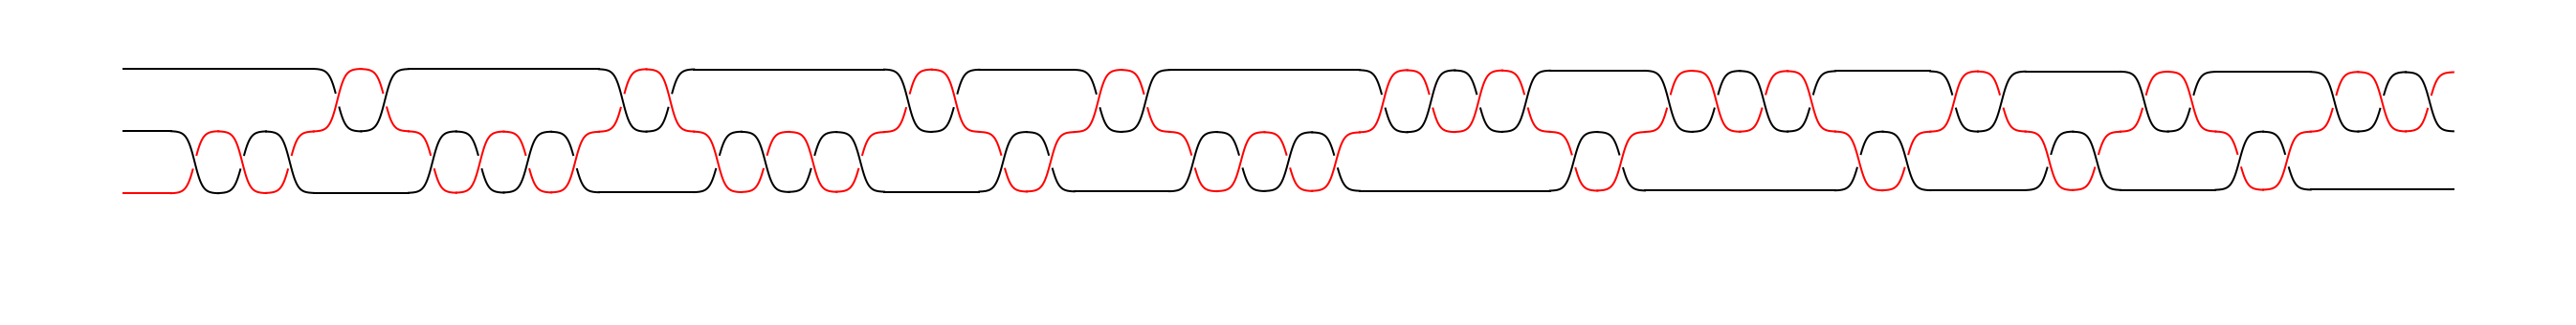

In [3]:
from anyon_simulator import AnyonSimulator

ic = AnyonSimulator()
braid(ic, iw)
ic.draw_circuit(colors={"1_3" : 'r'})

##### Task 2

Verify that the given weaving sequence approximates the identity matrix.

In [4]:
# %load single_qubit_braiding_tools.py

import numpy as np

def distance(w, u):
    """
    This function calculates the Hilbert-Schmidt distance between two unitaries w and u 
    up to a global phase.
    """
    res = w.T.conjugate() @ u
    tr = np.trace(res)
    return 1 - ( 1 / w.shape[0]**2 ) * (tr.conjugate() * tr).real

# sigma_1
sigma_1 = np.array([[np.exp(-4 * 1j * np.pi / 5), 0],
                    [0, np.exp(3 * 1j * np.pi / 5)]])
sigma_1_inv = sigma_1.T.conjugate()

# sigma_2
PHI = (1 + np.sqrt(5)) / 2
F = np.array([[1 / PHI, 1 / np.sqrt(PHI)],
              [1 / np.sqrt(PHI), -1 / PHI]])
R = sigma_1
sigma_2 = F @ R @ F
sigma_2_inv = sigma_2.T.conjugate()

# Identity
I = np.array([[1, 0],
              [0, 1]])

def to_unitary(braiding_sequence, target):
    """
    This function claculates the unitary matrix representation of the braiding_sequence 
    and measures its distance to the target unitary.
    """
    I = np.array([[1, 0],
                  [0, 1]])

    sigma = {1 : {1 : sigma_1, -1 : sigma_1_inv},
             2 : {1 : sigma_2, -1 : sigma_2_inv}}

    L = 0
    unitary = I
    for weave in braiding_sequence:
        for ii in range(abs(weave[1])):
            L += 1
            if weave[1] > 0:
                unitary = sigma[weave[0]][1] @ unitary
            else:
                unitary = sigma[weave[0]][-1] @ unitary

    print(f'Length = {L}')
    print(f'Target = \n{target}')
    print(f'\nBraiding Sequence = \n{unitary}')
    print(f'\nd(Target, Braiding Sequence) = {distance(unitary, target)}')


In [5]:
I = np.array([[1, 0], [0, 1]])
to_unitary(iw, I)

Length = 48
Target = 
[[1 0]
 [0 1]]

Braiding Sequence = 
[[ 0.99999886-0.00073962j -0.00115795+0.00062367j]
 [ 0.00115795+0.00062367j  0.99999886+0.00073962j]]

d(Target, Braiding Sequence) = 2.276844998649885e-06


### Injection Trick

Suppose that this identity weaving sequence is applied on 4 anyons such that the 4'th anyon is weft with the 2'nd and the 3'rd strands to end up in the 2'nd rank as shown in the demonstration bellow.

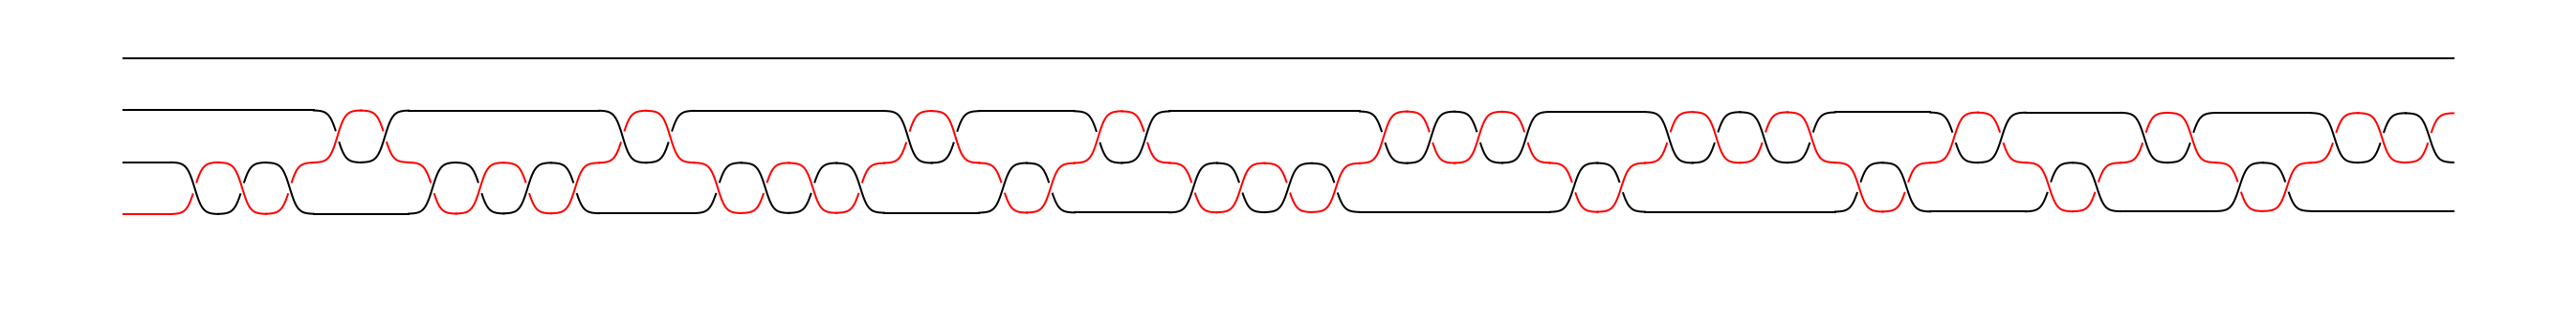

In [6]:
# Add one rank to the weaving sequence
from copy import deepcopy

iw4 = deepcopy(iw)
for ii, weave in enumerate(iw4):
    iw4[ii][0] += 1
    
# Draw the weaving sequence
ic4 = AnyonSimulator(n_qubits=1, n_anyons_per_qubit=4)
braid(ic4, iw4)
ic4.draw_circuit(colors={"1_4" : 'r'})

Since this weaving sequence is approximately equivalent to identity, it is also equivalent to doing nothing but **injecting** the 4'th anyon between the 1'st and the 2'nd anyon! Check carefully the red strand in the above weaving sequence diagram.

### Implementation of Injection Method

1. Implement the Injection weaving sequence $I$ on 4 anyons as mentioned above.
2. After the injection, we apply a given operation on the three bottom anyons (say $\sigma_1^2$) by weaving only the pre-injected anyon. 
3. Finally, apply again the inverse of $I$ which is $I^\dagger$ to turn the injected anyon back to its original place!

In conclusion, we apply the following weaving sequence: 

$$I \cdot \sigma_1^2 \cdot I^\dagger \approx \sigma_1^{3}\sigma_2^{-2}\sigma_1^{2}\sigma_2^{2}\sigma_1^{-2}\sigma_2^{2}\sigma_1^{4}\sigma_2^{-2}\sigma_1^{-4} \sigma_2^{-4} \sigma_1^{-2} \sigma_2^{-2} \sigma_1^{2} \sigma_2^{4}\sigma_1^{2}\sigma_2^{-4}\sigma_1^{-2}\sigma_2^3 
\cdot \sigma_1^2 \cdot \sigma_2^3 \sigma_1^{-2}\sigma_2^{-4}\sigma_1^{2}\sigma_2^{4}\sigma_1^{2} \sigma_2^{-2}\sigma_1^{-2}\sigma_2^{-4}\sigma_1^{-4}\sigma_2^{-2}\sigma_1^{4}\sigma_2^{2}\sigma_1^{-2}\sigma_2^{2}\sigma_1^{2}\sigma_2^{-2}\sigma_1^{3}$$

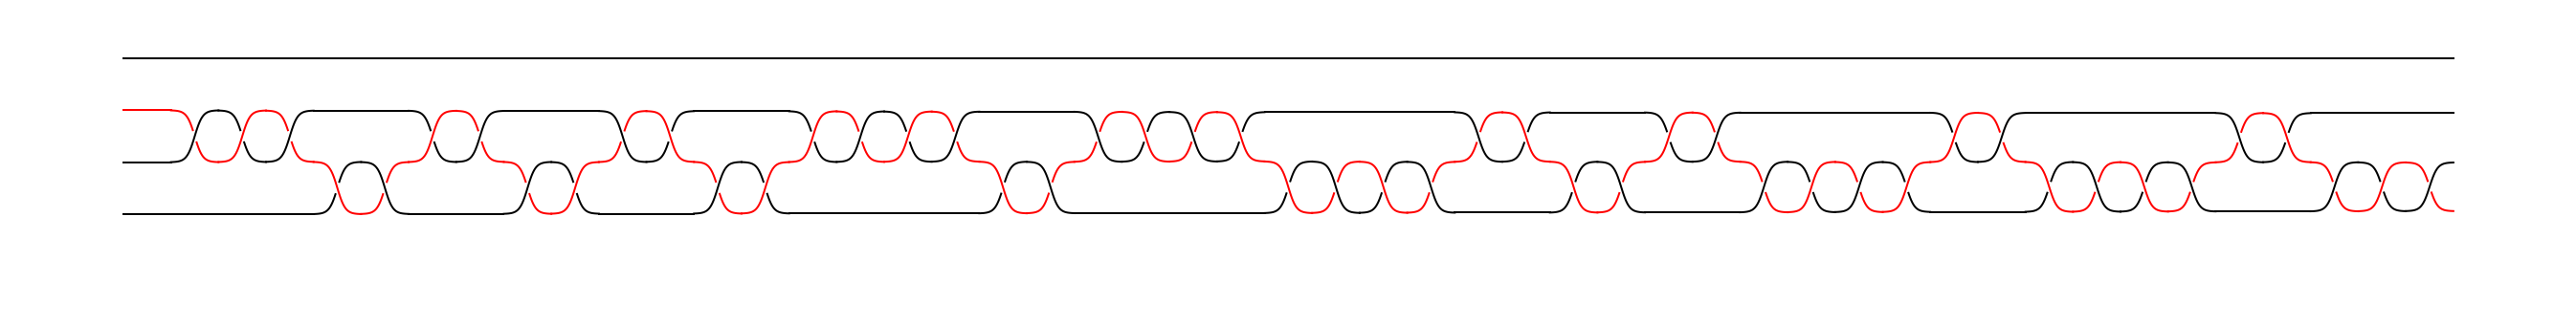

In [7]:
# Calculate the weaving sequence of inverse of I
iw4_inv = deepcopy(iw4)

# Invert all sigmas
for ii, weave in enumerate(iw4_inv):
    iw4_inv[ii][1] = -iw4_inv[ii][1]
    
# Invert the order of sigmas
iw4_inv = iw4_inv[::-1]

# Draw the weaving sequence
ic4_inv = AnyonSimulator(n_qubits=1, n_anyons_per_qubit=4)
braid(ic4_inv, iw4_inv)
ic4_inv.draw_circuit(colors={"1_2" : 'r'})

### Explanation

1. If the injected anyon was just the vacuum, then, all the weaving sequence is trivial and the result is that the state of the three lower anyons will not be affected by weaving vacuum!
2. If the injected anyon was a non-trivial Fibonacci anyon, then, this weaving sequence will operate on the state of the lower three anyons by applying $\sigma_1^2$. Right?!

Hence, this is exactly what a quantum scientist expect from a Controlled-$U$ gate ($CU$). By defintion, $CU$ gate applies $U$ on the target qubit only if the controlling qubit is in a given state. So, in the previous protocol, we have effictively controlled the qubit of three Fibonacci anyons using one controlling anyon!

<img src="./images/cu_1.png" width="35%" align="center">

However, we can do more than that since we can weave two anyons together instead of one anyon. The two anyons should be the first two anyons of the controlling qubit. Remember that when the controlling qubit is the state $\ket{0}$, then its two first anyons are fused to the vacuum, while they are fused to $1$ if the state of the controlling qubit is $\ket{1}$. 

<img src="./images/cu_2.png" width="35%" align="center">

Bingo! We got a controlled two qubit gate!

<img src="./images/cu.png" width="35%" align="center">

Notice that the braiding sequence will become double longer since each weave should be converted to two consecutive braids. For instance $\sigma_3 \Rightarrow \sigma_4 \sigma_3$ if the woven strand is the 3'rd one.

We code a function that transforms a weaving sequence to a braiding sequence by replacing the woven strand by a doubled strand.

In [8]:
import numpy as np
from copy import deepcopy

def to_doubled_strand(weaving_seq, initial_strand):
    """
    This function transforms a weaving sequence to a braiding sequence by replacing
    the woven strand with doubled strand (two adjacent strands).
    
    Inputs:
        weaving_seq : weaving sequence
        initial_strand : is the label of the woven strand eg. 1, 2, 3
    """
    braids = []
    woven_strand = deepcopy(initial_strand)
    for weave in weaving_seq:
        power = deepcopy(weave[1])
        index = deepcopy(weave[0])
        power_sign = np.sign(power)
        for ii in range(abs(power)):
            if woven_strand == index:
                braids.append([index + 1, power_sign])
                braids.append([index, power_sign])
                woven_strand += 1
            else:
                braids.append([index, power_sign])
                braids.append([index + 1, power_sign])
                woven_strand += -1
    
    return braids

Transform the weaving sequence of $U = \sigma_1^2$ to a braiding sequence of 4 anyons where the second strand is replaced by doubled strand.

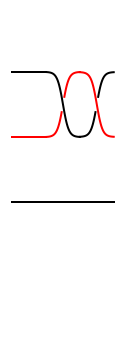

In [9]:
# Draw U in 3 anyons
uw = [[1, 2]]
uc = AnyonSimulator(n_anyons_per_qubit=3)
braid(uc, uw)
uc.draw_circuit(colors={"1_2" : 'r'})

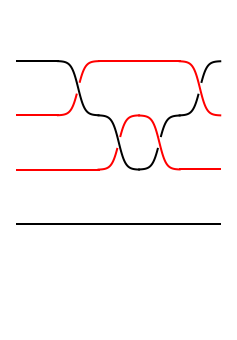

In [10]:
# Transform U to 4 anyons by doubling the second strand
uw4 = to_doubled_strand(uw, initial_strand=2)
uc4 = AnyonSimulator(n_anyons_per_qubit=4)
braid(uc4, uw4)
uc4.draw_circuit(colors={"1_2" : 'r', "1_3" : 'r'})

## CNOT Gate

We are now in position to construct a $CNOT$ gate. It is sufficient to follow the injection method and replace $U$ by $X$ gate. Using a single qubit braiding gate approximating algorithm, it is possible to find an approximation of $X$ gate such that the woven strand should start from the second position and returns back to the same position. We claim that the following weaving sequence is the best approximation of $X$ such that $L=44$ verifying edge conditions.

$$X \approx \sigma_1^{-2}\sigma_2^{-2}\sigma_1^2\sigma_2^{-2}\sigma_1^{2}\sigma_2^{-4}\sigma_1^{2}\sigma_2^{4}\sigma_1^{-2}\sigma_2^4\sigma_1^{-2}\sigma_2^2\sigma_1^{2}\sigma_2^{-2}\sigma_1^{4}\sigma_2^{-4}\sigma_1^{-2} $$

In [11]:
# Weaving sequence
xw = [[1, -2], [2, -4], [1, 4], [2, -2], [1, 2], [2, 2], [1, -2], [2, 4], [1, -2], [2, 4],
      [1, 2], [2, -4], [1, 2], [2, -2], [1, 2], [2, -2], [1, -2]]


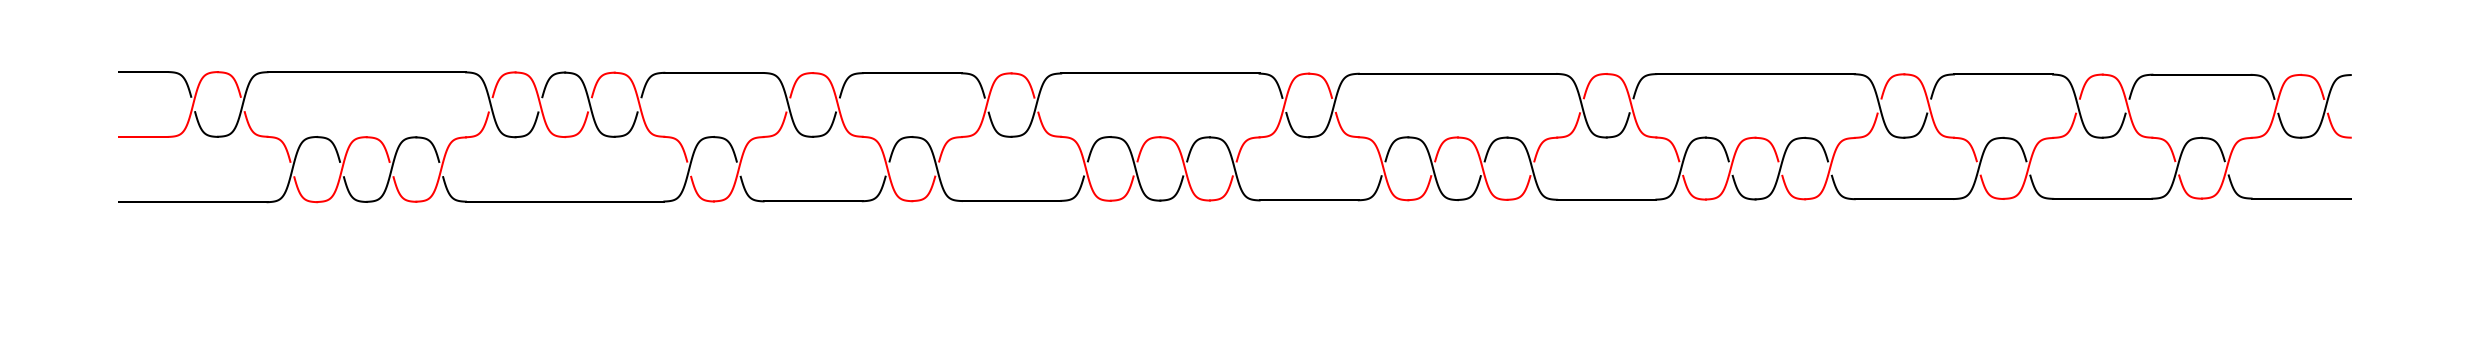

In [12]:
# Draw thw weaving sequence of X
xc = AnyonSimulator()
braid(xc, xw)
xc.draw_circuit(colors={"1_2" : 'r'})

Verify that this weaving sequence is a good approximation of $X$ gate.

In [13]:
X = np.array([[0, 1],
              [1, 0]])
to_unitary(xw, X)

Length = 44
Target = 
[[0 1]
 [1 0]]

Braiding Sequence = 
[[ 0.00063582-1.55426788e-04j -0.00055037+9.99999634e-01j]
 [ 0.00055037+9.99999634e-01j  0.00063582+1.55426788e-04j]]

d(Target, Braiding Sequence) = 7.313325895985656e-07


Notice that the obtained unitary matrix is $iX$ instead of $X$ which differ by a phase factor of $i$.

### CNOT Braiding Sequence

We should now concatenate 3 braiding sequences ($I$, $X$, $I^{-1}$) to construct $CNOT$.


First of all, we need to transfom the weaving sequences of $I$ and $X$ to a doubled strand waving sequences and increment the indices of $I$ by $+1$.

<img src="./images/cu.png" width="35%" align="center">

We transform the weaving sequence of $I$ in order to obtain the doubled weaving sequence as shown in the figure above and increment the indices of braiding operations by $+1$.

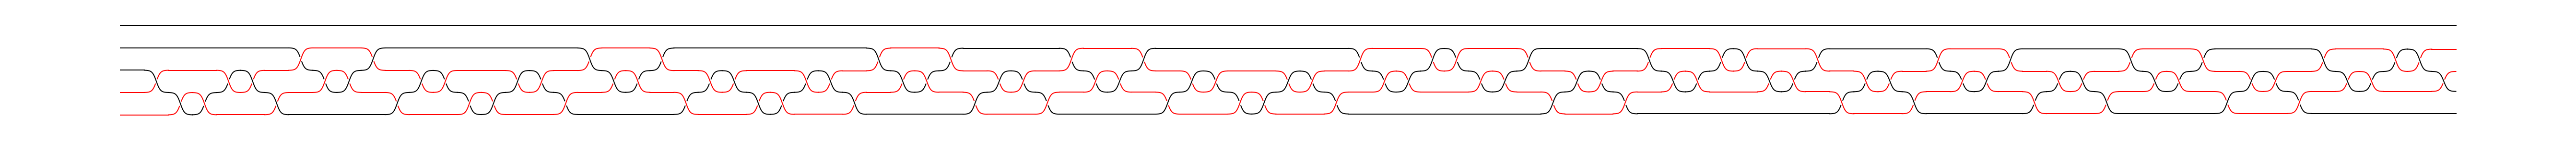

In [14]:
# transform the weaving sequence to a doubled weaving sequence
iwd = to_doubled_strand(weaving_seq=iw, initial_strand=3)

# Increment the indices of braiding opeations by +1
for ii, braid_ in enumerate(iwd):
    iwd[ii][0] += 1
    
icd = AnyonSimulator(n_anyons_per_qubit=5)
braid(icd, iwd)
icd.draw_circuit(colors={"1_4" : 'r', "1_5" : 'r'})

We compute the the inverse of injection ($I^{-1}$) by reflecting the braiding sequence and flipping the sign of braiding powers.

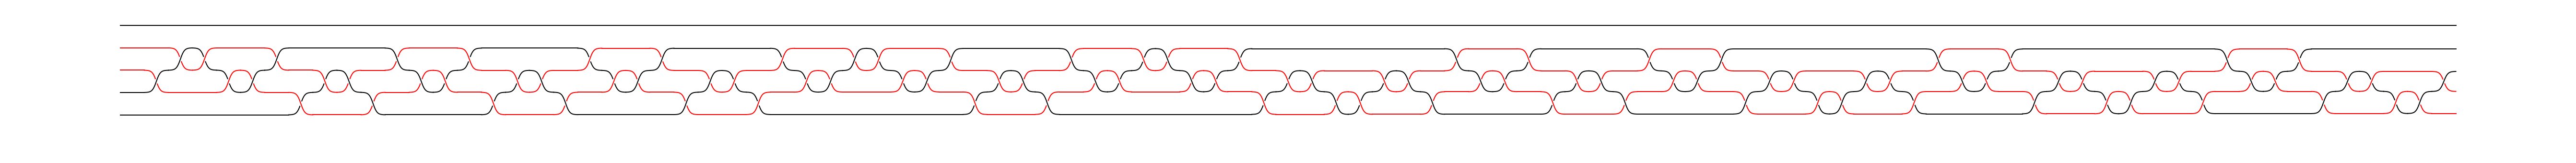

In [15]:
iwd_inv = deepcopy(iwd)
iwd_inv = iwd_inv[::-1]

for ii, braid_ in enumerate(iwd_inv):
    iwd_inv[ii][1] = -iwd[ii][1]

icd_inv = AnyonSimulator(n_anyons_per_qubit=5)
braid(icd_inv, iwd_inv)
icd_inv.draw_circuit(colors={"1_2" : 'r', "1_3" : 'r'})

We transform the weaving sequence of $X$ gate to obtain a doubled strand weaving sequence without incrementing the indices of braiding operations.

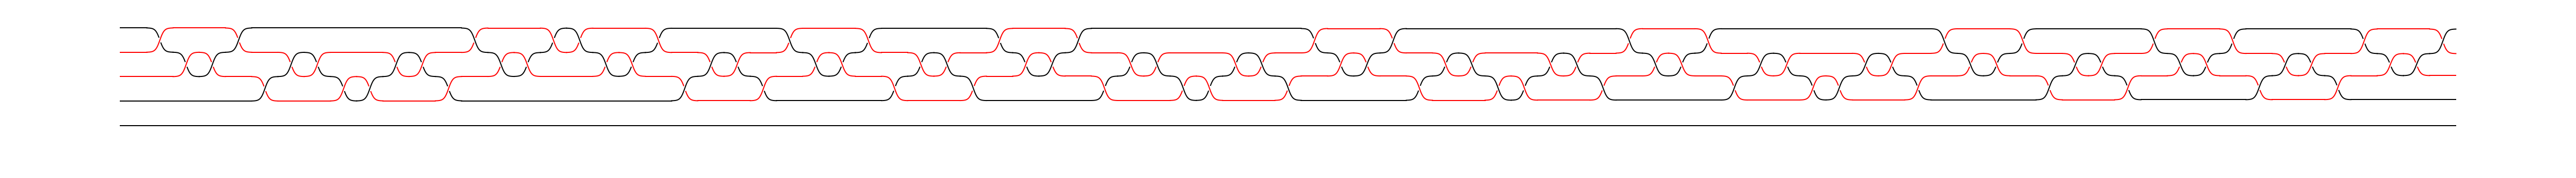

In [16]:
xwd = to_doubled_strand(weaving_seq=xw, initial_strand=2)
xcd = AnyonSimulator(n_anyons_per_qubit=5)
braid(xcd, xwd)
xcd.draw_circuit(colors={"1_2" : 'r', "1_3" : 'r'})

### The Unitary Matrix Representation of CNOT by Injection Method

At this point, we are in position to concatenate the three parts.

In [17]:
cnot_w = iwd + xwd + iwd_inv

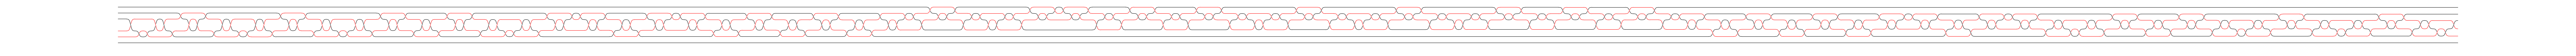

In [18]:
cnotc = AnyonSimulator(n_qubits=2, n_anyons_per_qubit=3)
braid(cnotc, cnot_w)
cnotc.draw_circuit(colors={"2_1" : 'r', "2_2" : 'r'})

(You may want to open the braid's image in a separate tab, as it is too long to properly show here.)

However, we should calculate the unitary representation of our braiding sequence. Right!?

Our knowledge of $\sigma_1$ and $\sigma_2$ is not enough since they act only on the fusion space of 3 anyons with overall anyonic charge of $1$ whose dimension is $2$.

In case of $6$ anyons, the fusion space of anyons is $13$ dimentional $\left(\text{Fibonacci}(6)=1+1+2+3+5+8+13 = 13\right)$. There are $5$ braiding operations $\sigma_i$ for $i=1,2,3,4,5$.

Such braiding operations are given by pre-designed library:

Sigma_1


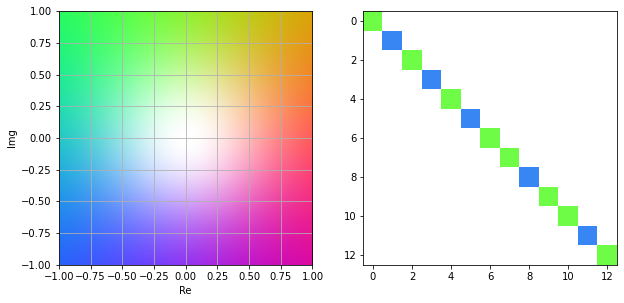

Sigma_2


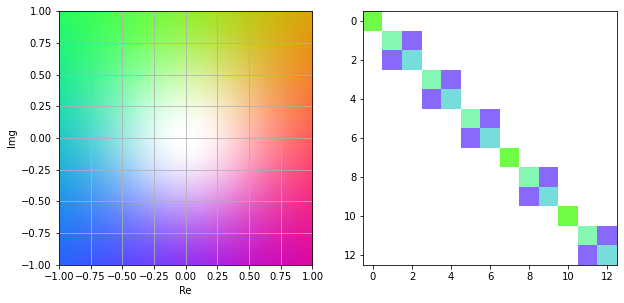

Sigma_3


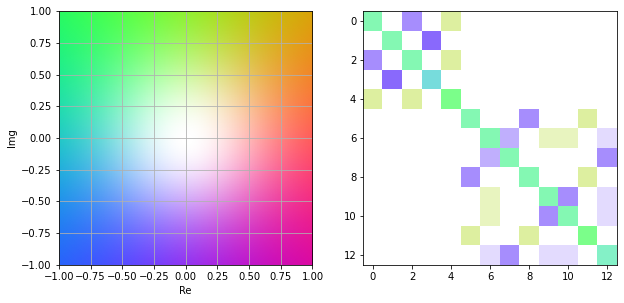

Sigma_4


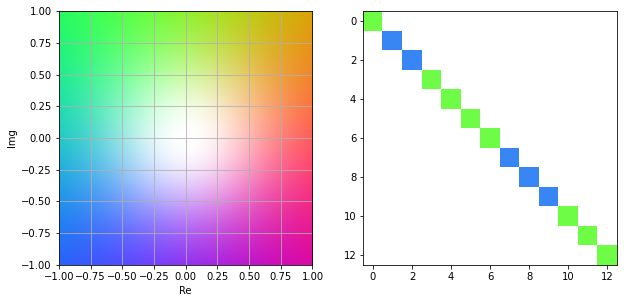

Sigma_5


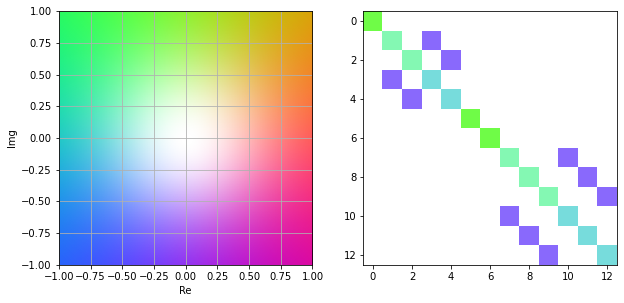

In [19]:
# Braiding operations of 6 anyons
import braiding_generators.fib_multi_qudits as bg

braiding_ops = []
for ii in range(5):
    print(f'Sigma_{ii+1}')
    braiding_op = bg.braiding_generator(index=ii+1, n_qudits=2, qudit_len=2, show=True)[0]
    braiding_ops.append(np.array(braiding_op))


The basis of fusion state of $6$ anyons is given as following:


6 anyons fusion state :

        1 1 1 1 1 1 
        \/  / \/  / 
        i\ /  k\ / 
          \     /     
          j\  l/     
            \ /     
            m\    
            
This state is represented by Python dict :

        {'qudits': [[i, j], [k, l], 'roots': [m]}


In [20]:
print('Basis Fusion States\n')
basis = bg.find_basis(n_qudits=2, qudit_len=2)
basis

Basis Fusion States



[{'qudits': [[1, 0], [1, 0]], 'roots': [0]},
 {'qudits': [[0, 1], [0, 1]], 'roots': [0]},
 {'qudits': [[1, 1], [0, 1]], 'roots': [0]},
 {'qudits': [[0, 1], [1, 1]], 'roots': [0]},
 {'qudits': [[1, 1], [1, 1]], 'roots': [0]},
 {'qudits': [[0, 1], [1, 0]], 'roots': [1]},
 {'qudits': [[1, 1], [1, 0]], 'roots': [1]},
 {'qudits': [[1, 0], [0, 1]], 'roots': [1]},
 {'qudits': [[0, 1], [0, 1]], 'roots': [1]},
 {'qudits': [[1, 1], [0, 1]], 'roots': [1]},
 {'qudits': [[1, 0], [1, 1]], 'roots': [1]},
 {'qudits': [[0, 1], [1, 1]], 'roots': [1]},
 {'qudits': [[1, 1], [1, 1]], 'roots': [1]}]

The **computational states** are ony the states which have $j=1$ and $l=1$ while $m=0$.

In [21]:
computational_basis = [1, 2, 3, 4]

print('Computational Basis are:\n')
for ii in computational_basis:
    print(basis[ii])

Computational Basis are:

{'qudits': [[0, 1], [0, 1]], 'roots': [0]}
{'qudits': [[1, 1], [0, 1]], 'roots': [0]}
{'qudits': [[0, 1], [1, 1]], 'roots': [0]}
{'qudits': [[1, 1], [1, 1]], 'roots': [0]}


##### Task 7

Compute the unitary representation of the braiding sequence of $CNOT$ in the computational basis. 

In [22]:
# Compute the unitary
unitary = np.eye(13) * (1 + 0j)
for braid_ in cnot_w:
    if braid_[1] > 0:
        unitary = braiding_ops[braid_[0]-1] @ unitary
    else:
        unitary = braiding_ops[braid_[0]-1].T.conjugate() @ unitary


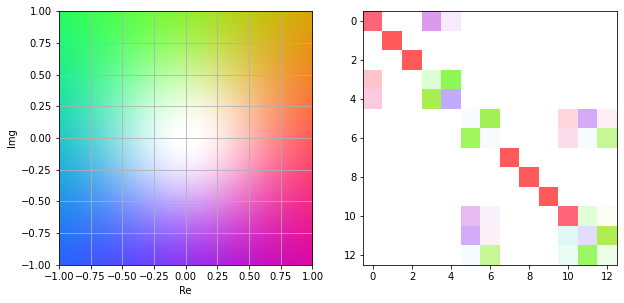

In [23]:
# plot the matrix
from cplot import cplot
cplot(unitary)

##### Task 8

Compute CNOT unitary in the computational basis.

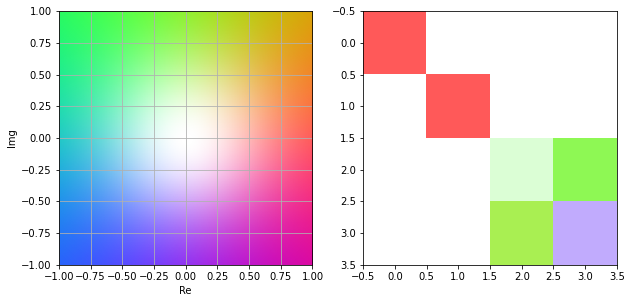

[[ 1.00000000e+00-4.71560873e-17j  6.67114319e-16+2.86464896e-17j
  -6.90117067e-16-2.88643235e-16j -5.39611861e-16-1.59573225e-16j]
 [-1.26327933e-17+1.51976736e-16j  1.00000000e+00+3.99003645e-16j
   1.25781438e-16-8.13627160e-17j -1.68742632e-15+1.48895279e-17j]
 [-4.43235998e-16+7.71444726e-16j  6.07844994e-17+1.67778607e-15j
  -1.27853561e-01+3.13991580e-01j -1.41191769e-01+8.31792330e-01j]
 [-8.49262581e-16+3.50622412e-16j -7.94864771e-16-1.09180397e-15j
   4.95389865e-02+7.91682636e-01j -1.27807508e-01-4.77314867e-01j]]


In [24]:
u = np.eye(4) * (1 + 0j)
for aa, ii in enumerate(computational_basis):
    for bb, jj in enumerate(computational_basis):
        u[aa][bb] = unitary[ii][jj]

cplot(u)
print(u)

##### Task 9

Compute the distance between this obtained $CNOT$ and the exact $CNOT$ whose target gate is the $iX$ gate.

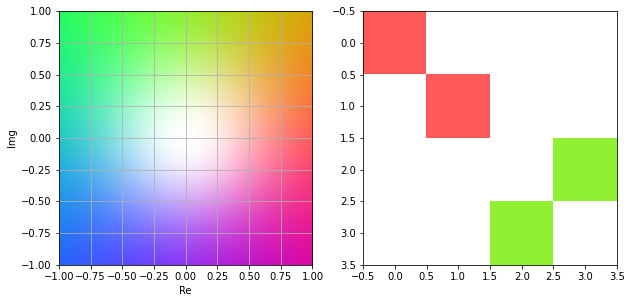

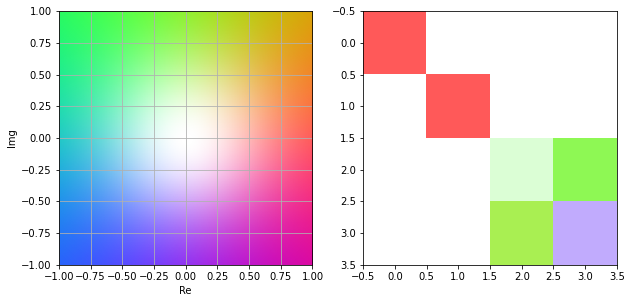

0.17887680869819378

In [25]:
exact_cnot = np.array([[1, 0, 0, 0],
                       [0, 1, 0, 0],
                       [0, 0, 0, 1j],
                       [0, 0, 1j, 0]])
cplot(exact_cnot)
cplot(u)
distance(u, exact_cnot)

Notice that Injection method gives the exact values when the controlling qubit is in the state $\ket{0}$. But when it is in the state $\ket{1}$, the target gate should be well approximated to avoid errors.